In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set()

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_bath = pd.read_csv('/content/drive/MyDrive/project-ds2/df_bath.csv')
df_assets = pd.read_csv('/content/drive/MyDrive/project-ds2/df_assets.csv')
df_toilet = pd.read_csv('/content/drive/MyDrive/project-ds2/df_toilet.csv')
df_condn = pd.read_csv('/content/drive/MyDrive/project-ds2/df_condn.csv')
df_floor = pd.read_csv('/content/drive/MyDrive/project-ds2/df_floor.csv')
df_roof = pd.read_csv('/content/drive/MyDrive/project-ds2/df_roof.csv')
df_room = pd.read_csv('/content/drive/MyDrive/project-ds2/df_room.csv')
df_fuel = pd.read_csv('/content/drive/MyDrive/project-ds2/df_fuel.csv')
df_light = pd.read_csv('/content/drive/MyDrive/project-ds2/df_light.csv')
df_kitchen = pd.read_csv('/content/drive/MyDrive/project-ds2/df_kitchen.csv')
df_water = pd.read_csv('/content/drive/MyDrive/project-ds2/df_water.csv')
df_house = pd.read_csv('/content/drive/MyDrive/project-ds2/df_house.csv')
df_waste = pd.read_csv('/content/drive/MyDrive/project-ds2/df_waste.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**let's try to rank the states for living.**

In [7]:
bath_sc = df_bath.groupby('State Name').agg('mean').drop('District Code', axis=1)
bath_sc['score'] = bath_sc['Bathroom']/100
bath_sc.head()

,Bathroom,Enclosure without roof,No,score
State Name,,,,
ANDAMAN & NICOBAR ISLANDS,39.680841,15.820561,44.501869,0.396808
ANDHRA PRADESH,31.707414,19.275040,49.017192,0.317074
ARUNACHAL PRADESH,11.204002,12.844354,75.950861,0.112040
ASSAM,15.561257,15.789778,68.648778,0.155613
BIHAR,9.509703,25.863166,64.627133,0.095097


In [8]:
assets_sc = df_assets.groupby('State Name').agg('mean').drop('District Code', axis=1)
assets_sc['score'] = (assets_sc.sum(axis=1) - (assets_sc['Without Internet'] 
                                              + assets_sc['None of the assets specified in col. 10 to 19']))/100
assets_sc.head()

,Total number of households availing banking services,Radio/Transistor,Television,With Internet,Without Internet,Landline only,Mobile only,Both,Bicycle,Scooter/ Motorcycle/Moped,Car/ Jeep/Van,"Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car",None of the assets specified in col. 10 to 19,score
State Name,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,87.063785,30.832009,43.897897,1.134346,3.628037,3.878505,54.269393,6.482477,17.940888,13.509346,2.921262,1.753271,20.328505,2.636832
ANDHRA PRADESH,50.165630,7.363908,45.289905,0.825583,4.670525,2.993629,47.020001,2.277745,26.767124,11.786547,1.171636,1.215921,29.335718,1.968776
ARUNACHAL PRADESH,38.628502,24.045659,20.624465,0.701183,5.128415,1.974595,26.094501,2.517818,11.350374,10.406577,4.535810,1.163390,46.270698,1.420429
ASSAM,38.933785,24.472149,21.416992,0.807885,6.704163,1.864503,38.096518,1.623997,58.262950,7.834227,2.258886,1.189910,24.580549,1.967618
BIHAR,45.269722,25.435337,12.886614,0.689691,6.342428,2.215903,51.785900,1.512545,49.552284,7.736056,1.606701,0.649181,25.516917,1.993399


In [9]:
toilet_sc = df_toilet.groupby('State Name').agg('mean').drop('District Code', axis=1)
toilet_sc['score'] = (toilet_sc['Number of households having latrine facility within the premises'] 
                                               + toilet_sc['Piped sewer system'] + toilet_sc['Septic tank']
                                               + toilet_sc['Other system'] + toilet_sc['With slab/ventilated improved pit'])/100
toilet_sc.head()

,Number of households having latrine facility within the premises,Number of households not having latrine facility within the premises,Piped sewer system,Septic tank,Other system,With slab/ventilated improved pit,Without slab/ open pit,Night soil disposed into open drain,Night soil removed by human,Night soil serviced by animal,Public latrine,Open,score
State Name,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,45.980841,54.019159,2.741121,38.530140,1.975935,0.628271,1.852804,0.214486,0.003271,0.034579,0.660047,53.357944,0.898563
ANDHRA PRADESH,29.220296,70.779704,3.774727,19.015279,0.888898,4.429773,0.499662,0.411065,0.021382,0.179421,2.547394,68.232115,0.573290
ARUNACHAL PRADESH,41.502627,58.497373,2.835827,8.660292,9.756447,3.000296,10.997877,0.730416,0.305881,5.215730,3.171829,55.325613,0.657555
ASSAM,53.320257,46.679739,3.526342,8.625727,8.013988,8.598182,22.898535,0.760609,0.287241,0.609008,2.202422,44.477417,0.820845
BIHAR,19.163697,80.836301,1.361844,13.411320,1.897531,1.421742,0.643868,0.192328,0.063899,0.171123,1.072287,79.763846,0.372561


In [10]:
condn_sc = df_condn.groupby('State Name').agg('mean').drop('District Code', axis=1)
condn_sc['score'] = (condn_sc['Residence: Good'] + condn_sc['Residence: Livable']*0.5 
                     + condn_sc['Residence-cum-other use: Good']
                     + condn_sc['Residence-cum-other use: Livable']*0.5)/100
condn_sc.head()

,Residence: Good,Residence: Livable,Residence: Dilapidated,Residence-cum-other use: Good,Residence-cum-other use: Livable,Residence-cum-other use: Dilapidated,score
State Name,,,,,,,
ANDAMAN & NICOBAR ISLANDS,54.640187,40.930841,2.372196,0.858178,1.172664,0.024299,0.765501
ANDHRA PRADESH,63.626146,30.652302,4.082826,1.084484,0.515830,0.036049,0.802947
ARUNACHAL PRADESH,45.467635,48.587333,4.162415,0.876596,0.873482,0.032139,0.710746
ASSAM,28.904984,59.845042,9.821339,0.372771,0.928771,0.126736,0.596647
BIHAR,32.886417,55.644748,7.251991,1.317955,2.597202,0.301336,0.633253


In [11]:
roof_sc = df_roof.groupby('State Name').agg('mean').drop('District Code', axis=1)
roof_sc['score'] = (roof_sc.sum(axis=1) - (roof_sc['Grass/ Thatch/ Bamboo/ Wood/Mud etc.'] + roof_sc['Plastic/ Polythene']))/100
roof_sc.head()

,Grass/ Thatch/ Bamboo/ Wood/Mud etc.,Plastic/ Polythene,Hand made Tiles,Machine made Tiles,Burnt Brick,Stone/ Slate,G.I./Metal/ Asbestos sheets,Concrete,Any other material,score
State Name,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,20.474065,0.920327,0.052336,0.025000,0.019159,0.878271,72.744393,3.340654,1.543925,0.786037
ANDHRA PRADESH,19.428130,0.243403,7.296060,17.253783,0.285366,5.807454,10.472576,38.799002,0.414348,0.803286
ARUNACHAL PRADESH,57.267774,0.985053,0.503445,0.043832,0.058883,0.778093,38.339481,0.718131,1.304367,0.417462
ASSAM,27.180144,1.580627,0.707406,0.241486,0.129853,0.616830,68.358956,0.970614,0.213723,0.712389
BIHAR,30.528797,0.935385,20.400456,0.851025,9.105755,7.383514,9.046333,21.333979,0.414760,0.685358


In [12]:
room_sc = df_room.groupby('State Name').agg('mean').drop('District Code', axis=1)
room_sc['score'] = (room_sc['One room']*1/6 + room_sc['Two rooms']*1/3 + room_sc['Three rooms']*1/2 
                    + room_sc['Four rooms']*2/3 + room_sc['Five rooms']*5/6 + room_sc['Six rooms and above']*1 )/100
room_sc.head()

,No exclusive room,One room,Two rooms,Three rooms,Four rooms,Five rooms,Six rooms and above,score
State Name,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,2.994626,27.755841,36.706075,23.550000,5.577103,2.053738,1.361916,0.354278
ANDHRA PRADESH,3.140512,45.739490,34.736098,10.736539,4.215048,0.757973,0.674456,0.286863
ARUNACHAL PRADESH,6.095981,39.473029,32.294832,14.293544,4.922290,1.569410,1.350026,0.304299
ASSAM,3.050283,29.759733,31.657513,19.606228,8.873345,3.845737,3.205971,0.376419
BIHAR,2.828559,39.675171,30.405039,11.737467,6.981178,3.408914,4.963053,0.350742


In [13]:
fuel_sc = df_fuel.groupby('State Name').agg('mean').drop('District Code', axis=1)
fuel_sc['score'] = (fuel_sc['LPG/PNG'] + fuel_sc['Biogas'] + fuel_sc['Electricity'])/100
fuel_sc.head()

,Fire-wood,Crop residue,Cowdung cake,"Coal,Lignite,Charcoal",Kerosene,LPG/PNG,Electricity,Biogas,Any other,No cooking,score
State Name,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,65.931542,0.423598,0.044626,0.004907,10.382243,22.029907,0.084112,0.066121,0.148598,0.878972,0.221801
ANDHRA PRADESH,75.105044,1.627181,0.581356,0.261587,1.357662,20.043393,0.046436,0.572281,0.104968,0.298208,0.206621
ARUNACHAL PRADESH,90.499930,0.809657,0.068801,0.013155,0.179067,8.020741,0.081486,0.076283,0.045467,0.204890,0.081785
ASSAM,83.225414,4.773621,0.695594,0.071652,0.242384,10.238210,0.046455,0.105798,0.267010,0.333119,0.103905
BIHAR,34.724994,28.491176,28.129781,0.758225,0.253540,5.781355,0.118166,0.281308,1.277164,0.184435,0.061808


In [14]:
light_sc = df_light.groupby('State Name').agg('mean').drop('District Code', axis=1)
light_sc['score'] = (light_sc['Solar energy']*5 + light_sc['Electricity'])/100
light_sc.head()

,Electricity,Kerosene,Solar energy,Other oil,Any other,No lighting,score
State Name,,,,,,,
ANDAMAN & NICOBAR ISLANDS,64.140888,30.333411,1.819860,2.781308,0.131542,0.793224,0.732402
ANDHRA PRADESH,85.511150,13.219991,0.351033,0.329761,0.093991,0.493623,0.872663
ARUNACHAL PRADESH,43.853315,20.178511,6.545380,0.585036,5.051436,23.786393,0.765802
ASSAM,26.714875,70.920047,1.883258,0.171372,0.095671,0.214588,0.361312
BIHAR,14.077917,84.567987,0.680434,0.329480,0.256127,0.087553,0.174801


In [15]:
kitchen_sc = df_kitchen.groupby('State Name').agg('mean').drop('District Code', axis=1)
kitchen_sc['score'] = (kitchen_sc['inside: Has Kitchen'] + kitchen_sc['outside: Has Kitchen']*0.5)/100
kitchen_sc.head()

,inside: Has Kitchen,inside: Does not have kitchen,outside: Has Kitchen,outside: Does not have kitchen,No Cooking,score
State Name,,,,,,
ANDAMAN & NICOBAR ISLANDS,78.470561,4.045561,15.091355,1.512383,0.878972,0.860162
ANDHRA PRADESH,39.322103,27.359618,8.300995,24.718622,0.298208,0.434726
ARUNACHAL PRADESH,82.678145,12.780651,2.872960,1.463772,0.204890,0.841146
ASSAM,71.073688,8.477082,16.970202,3.145310,0.333119,0.795588
BIHAR,21.804855,62.011443,8.210141,7.788968,0.184435,0.259099


In [16]:
water_sc = df_water.groupby('State Name').agg('mean').drop('District Code', axis=1)
water_sc['score'] = (water_sc['Tapwater from treated source'] + water_sc['Tapwater fromun-treated source']*0.5)/100
water_sc.head()

,Tapwater from treated source,Tapwater fromun-treated source,Covered well,Un-covered well,Handpump,Tubewell/Borehole,Spring,River/Canal,Tank/Pond/Lake,Other sources,score
State Name,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,37.776402,21.748832,1.290187,16.400701,0.014019,0.537150,5.612850,6.246729,4.297664,6.076869,0.486508
ANDHRA PRADESH,33.097986,23.033576,0.569345,8.847583,19.231117,7.632103,4.664343,1.063610,0.294837,1.562770,0.446148
ARUNACHAL PRADESH,18.442370,42.073917,0.926240,4.390552,5.086637,1.326135,9.720846,10.823821,1.352375,5.856934,0.394793
ASSAM,5.146647,1.205960,1.482703,21.635327,45.825760,9.094552,3.239954,6.104826,4.264684,1.998616,0.057496
BIHAR,2.439870,1.224176,0.775552,6.355592,85.251113,2.019071,0.081067,0.396465,0.128326,1.327917,0.030520


In [17]:
house_sc = df_house.groupby('State Name').agg('mean').drop('District Code', axis=1)
house_sc['score'] = (house_sc['Permanent'] + house_sc['Semi-Permanent']*0.5)/100
house_sc.head()

,Permanent,Semi-Permanent,Total Temporary,Serviceable,Non-Serviceable,Unclassifiable,score
State Name,,,,,,,
ANDAMAN & NICOBAR ISLANDS,25.264486,51.889486,21.109346,1.020093,20.089720,1.732243,0.512092
ANDHRA PRADESH,62.638888,21.873054,14.550011,9.187106,5.362862,0.937972,0.735754
ARUNACHAL PRADESH,9.011032,30.751018,57.488498,4.100853,53.387420,2.748791,0.243865
ASSAM,18.462862,52.464430,28.457837,1.092491,27.365335,0.614897,0.446951
BIHAR,46.273357,25.376169,27.650708,10.981725,16.668638,0.699125,0.589614


In [18]:
waste_sc = df_waste.groupby('State Name').agg('mean').drop('District Code', axis=1)
waste_sc['score'] = (waste_sc['Closed drainage'] + waste_sc['Open drainage']*0.25)/100
waste_sc.head()

,Closed drainage,Open drainage,No drainage,score
State Name,,,,
ANDAMAN & NICOBAR ISLANDS,5.365888,22.460280,72.173598,0.109810
ANDHRA PRADESH,9.869190,31.335845,58.795281,0.177032
ARUNACHAL PRADESH,2.438959,16.599374,80.961824,0.065888
ASSAM,1.800861,12.255087,85.944015,0.048646
BIHAR,5.536408,39.760141,54.703436,0.154764


In [19]:
data = [water_sc['score'], kitchen_sc['score'], light_sc['score'], room_sc['score'],bath_sc['score'], house_sc['score'],
        roof_sc['score'], fuel_sc['score'], condn_sc['score'], toilet_sc['score'], assets_sc['score'], waste_sc['score']]

headers = ['water', 'kitchen', 'light', 'room', 'house', 'bath', 'roof', 'fuel', 'condn', 'toilet', 'assets', 'waste']

score_df = pd.concat(data, axis=1, keys=headers)

score_df

,water,kitchen,light,room,house,bath,roof,fuel,condn,toilet,assets,waste
State Name,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,0.486508,0.860162,0.732402,0.354278,0.396808,0.512092,0.786037,0.221801,0.765501,0.898563,2.636832,0.109810
ANDHRA PRADESH,0.446148,0.434726,0.872663,0.286863,0.317074,0.735754,0.803286,0.206621,0.802947,0.573290,1.968776,0.177032
ARUNACHAL PRADESH,0.394793,0.841146,0.765802,0.304299,0.112040,0.243865,0.417462,0.081785,0.710746,0.657555,1.420429,0.065888
ASSAM,0.057496,0.795588,0.361312,0.376419,0.155613,0.446951,0.712389,0.103905,0.596647,0.820845,1.967618,0.048646
BIHAR,0.030520,0.259099,0.174801,0.350742,0.095097,0.589614,0.685358,0.061808,0.633253,0.372561,1.993399,0.154764
CHANDIGARH,0.951900,0.687020,0.987420,0.341063,0.890220,0.966050,0.968200,0.719200,0.834140,1.800120,4.335820,0.906055
CHHATTISGARH,0.104502,0.540004,0.800405,0.349593,0.081446,0.567544,0.896238,0.059523,0.695062,0.334459,1.815292,0.064285
DADRA & NAGAR HAVELI,0.335619,0.845572,0.926258,0.283617,0.340557,0.735175,0.970814,0.267660,0.786985,0.725660,1.956309,0.182515
DAMAN & DIU,0.750034,0.794041,0.989110,0.351790,0.742315,0.976575,0.992370,0.628849,0.877836,1.393562,3.566137,0.460466


**Scoring based on Min-Max scaling.</br>This will normalize the scores for each column.**

In [20]:
score_df_minmax = score_df.copy()
for i in score_df_minmax.columns:
  scaler = MinMaxScaler()
  score_df_minmax[i] = scaler.fit_transform(score_df_minmax[[i]])

score_df_minmax['scores_normalized'] = score_df_minmax.sum(axis=1)
score_df_minmax = score_df_minmax.sort_values('scores_normalized',ascending=False)
score_df_minmax

,water,kitchen,light,room,house,bath,roof,fuel,condn,toilet,assets,waste,scores_normalized
State Name,,,,,,,,,,,,,
CHANDIGARH,1.000000,0.605781,0.988829,0.385812,0.943908,0.985635,0.957959,0.827668,0.853185,0.914933,1.000000,1.000000,10.463709
NCT OF DELHI,0.781863,0.726313,0.987509,0.532788,0.897363,0.980468,0.961380,1.000000,0.742961,0.863619,0.938780,0.650870,10.063916
GOA,0.838221,0.937750,0.959465,0.732904,0.790718,0.883438,0.977414,0.758367,0.975424,0.743213,0.916314,0.458734,9.971962
KERALA,0.301564,1.000000,0.959086,0.945663,0.905227,0.913234,0.962947,0.514272,0.827556,0.977760,0.762399,0.372549,9.442257
DAMAN & DIU,0.780909,0.757284,0.990885,0.417109,0.777416,1.000000,1.000000,0.720125,1.000000,0.688304,0.753393,0.484048,9.369473
LAKSHADWEEP,0.102827,0.755032,1.000000,1.000000,1.000000,0.991145,0.960176,0.130073,0.917435,1.000000,0.828227,0.091730,8.776645
HIMACHAL PRADESH,0.877267,0.807010,0.968619,0.889932,0.677842,0.824785,0.893981,0.288285,0.867160,0.632882,0.567502,0.312360,8.607624
PUDUCHERRY,0.931553,0.675170,0.971988,0.284387,0.683536,0.768538,0.625244,0.762427,0.937842,0.631375,0.778773,0.350740,8.401575
PUNJAB,0.340347,0.614105,0.962360,0.675303,0.666751,0.914013,0.849729,0.542683,0.422249,0.684348,0.860453,0.321060,7.853401


**Scoring based on standardization: </br>We shall standardize the columns before assigning the final scores.**

In [21]:
score_df_std = score_df.copy()
for i in score_df_std.columns:
  scaler = StandardScaler()
  score_df_std[i] = scaler.fit_transform(score_df_std[[i]])

score_df_std['scores_standardized'] = score_df_std.sum(axis=1)
score_df_std = score_df_std.sort_values('scores_standardized',ascending=False)
score_df_std

,water,kitchen,light,room,house,bath,roof,fuel,condn,toilet,assets,waste,scores_standardized
State Name,,,,,,,,,,,,,
CHANDIGARH,2.157372,0.001801,0.940901,-0.321186,1.759987,1.411466,1.096470,2.101656,1.129184,1.647704,2.078516,3.954569,17.958439
NCT OF DELHI,1.382593,0.470495,0.936148,0.328614,1.604434,1.391947,1.111783,2.765308,0.706004,1.460273,1.855910,2.240649,16.254159
GOA,1.582766,1.292672,0.835184,1.213358,1.248022,1.025391,1.183552,1.834780,1.598499,1.020473,1.774219,1.297430,15.906346
KERALA,-0.323337,1.534735,0.833819,2.153997,1.630715,1.137952,1.118796,0.894769,1.030790,1.877189,1.214559,0.874338,13.978322
DAMAN & DIU,1.379205,0.590926,0.948303,-0.182820,1.203567,1.465733,1.284645,1.687509,1.692854,0.819911,1.181812,1.421698,13.493342
LAKSHADWEEP,-1.029213,0.582167,0.981117,2.394227,1.947448,1.432283,1.106397,-0.584780,1.375863,1.958422,1.453920,-0.504239,11.113611
HIMACHAL PRADESH,1.721448,0.784286,0.868138,1.907599,0.870790,0.803814,0.810107,0.024496,1.182840,0.617474,0.505883,0.578861,10.675739
PUDUCHERRY,1.914260,0.271623,0.880271,-0.769600,0.889819,0.591330,-0.392748,1.850416,1.454209,0.611972,1.274099,0.767274,9.342924
PUNJAB,-0.185589,0.034169,0.845607,0.958695,0.833722,1.140898,0.612036,1.004179,-0.525309,0.805462,1.571101,0.621572,7.716544


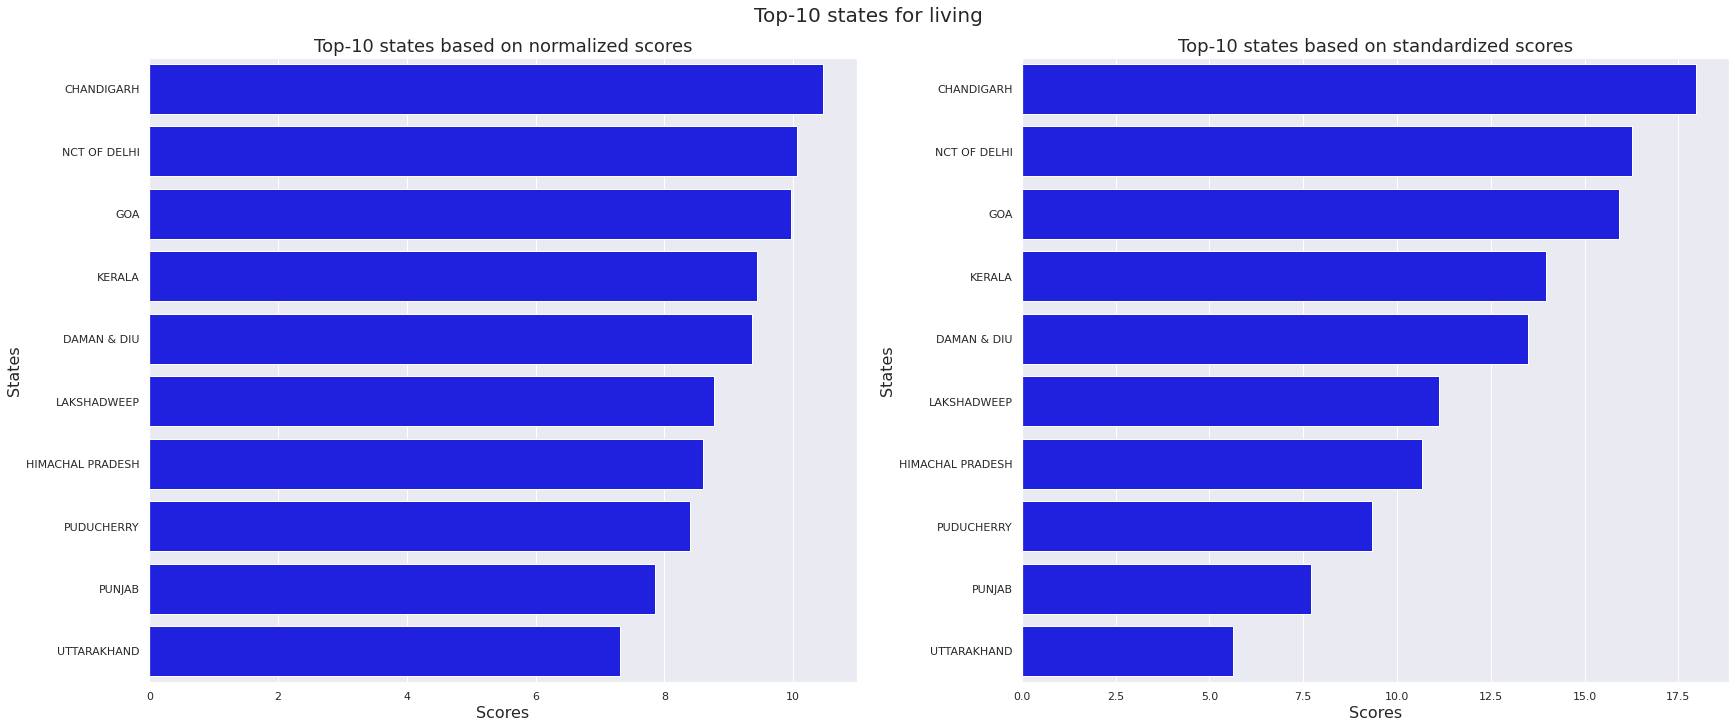

In [22]:
fig, axes = plt.subplots(1,2, figsize=(24,10), constrained_layout = True)
fig.suptitle('Top-10 states for living', fontsize=20)

sns.barplot(y=score_df_minmax.index[:10], x=score_df_minmax['scores_normalized'][:10], ax=axes[0], color='blue')
axes[0].set_title('Top-10 states based on normalized scores', fontsize=18)
axes[0].set_xlabel('Scores', fontsize=16)
axes[0].set_ylabel('States', fontsize=16)

sns.barplot(y=score_df_std.index[:10], x=score_df_std['scores_standardized'][:10], ax=axes[1], color='blue')
axes[1].set_title('Top-10 states based on standardized scores', fontsize=18)
axes[1].set_xlabel('Scores', fontsize=16)
axes[1].set_ylabel('States', fontsize=16)

# plt.savefig('/content/drive/MyDrive/project-ds2/EDA Plots/' + 'top_scores' + '.jpg', dpi=300)

plt.show()

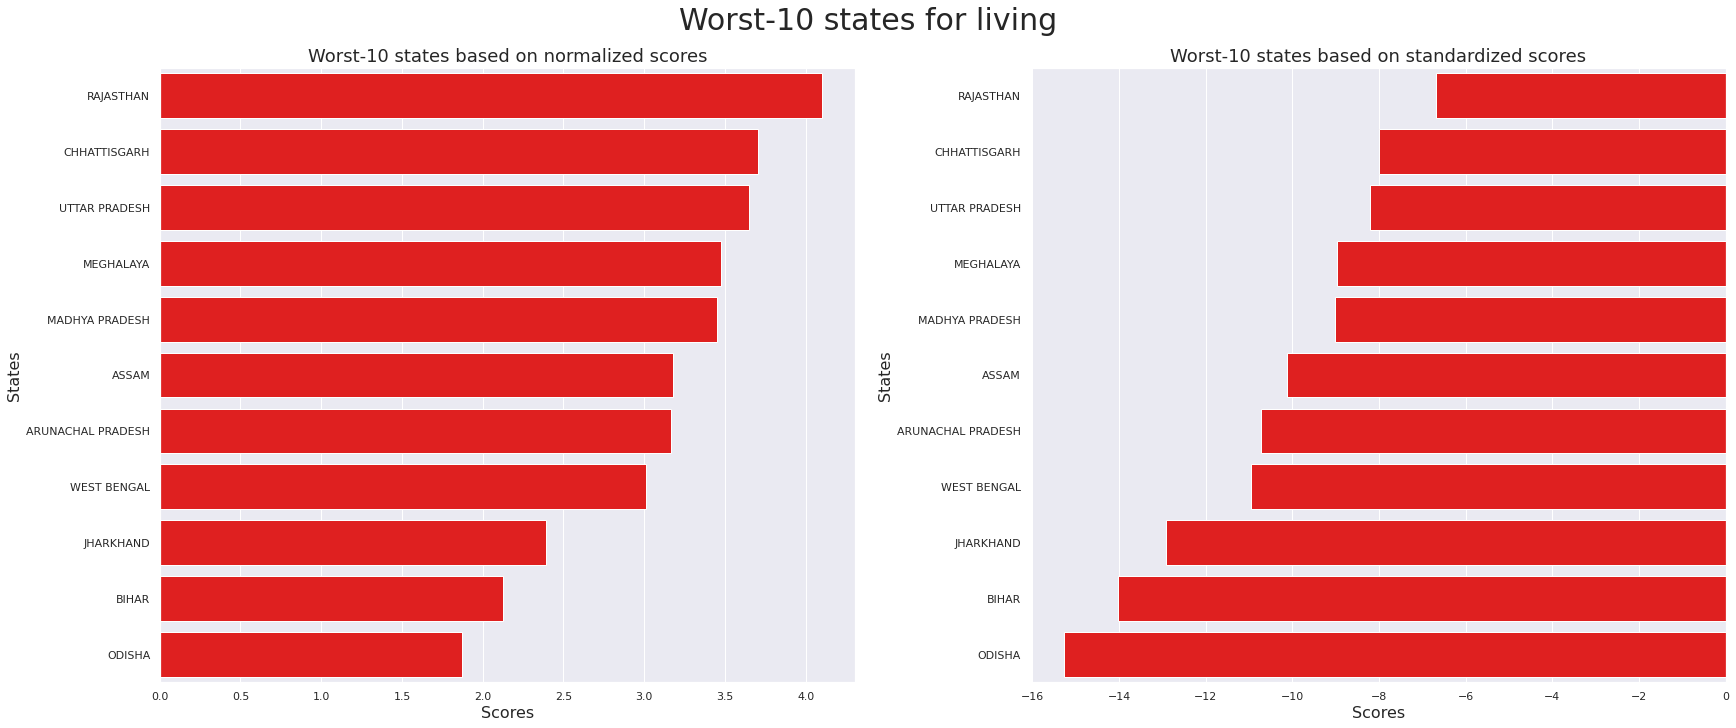

In [23]:
fig, axes = plt.subplots(1,2, figsize=(24,10), constrained_layout = True)
fig.suptitle('Worst-10 states for living', fontsize=30)

sns.barplot(y=score_df_minmax.index[-11:], x=score_df_minmax['scores_normalized'][-11:], ax=axes[0], color='red')
axes[0].set_title('Worst-10 states based on normalized scores', fontsize=18)
axes[0].set_xlabel('Scores', fontsize=16)
axes[0].set_ylabel('States', fontsize=16)

sns.barplot(y=score_df_std.index[-11:], x=score_df_std['scores_standardized'][-11:], ax=axes[1], color='red')
axes[1].set_title('Worst-10 states based on standardized scores', fontsize=18)
axes[1].set_xlabel('Scores', fontsize=16)
axes[1].set_ylabel('States', fontsize=16)

# plt.savefig('/content/drive/MyDrive/project-ds2/EDA Plots/' + 'least_scores' + '.jpg', dpi=300)

plt.show()

**The scores are based on the household facillites only. The scores should also contain different features**

In [24]:
# score_df_std.to_csv('/content/drive/MyDrive/project-ds2/scores_standardized.csv', index=False)
# score_df_minmax.to_csv('/content/drive/MyDrive/project-ds2/scores_mormalized.csv', index=False)